## 1. Import Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

# Basic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn Model Selection & Preprocessing
from sklearn.model_selection import (
    train_test_split, GridSearchCV, StratifiedKFold, cross_val_score, 
    cross_val_predict, RandomizedSearchCV, KFold
)
from sklearn.preprocessing import (
    StandardScaler, power_transform, LabelEncoder, OneHotEncoder, 
    MinMaxScaler
)
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer, KNNImputer

# Scikit-learn Metrics
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix, f1_score, 
    precision_score, recall_score, ConfusionMatrixDisplay, 
    mean_squared_error, make_scorer
)

# Scikit-learn Classifiers
from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier, 
    AdaBoostClassifier, BaggingClassifier, VotingClassifier
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import (
    MultinomialNB, GaussianNB, ComplementNB, BernoulliNB
)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Other Classifiers
import xgboost as xgb
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Scikit-learn Pipeline
from sklearn.pipeline import Pipeline

## 2. Get Data

In [2]:
train_df = pd.read_csv(r"music-data/train.csv")
test_df = pd.read_csv(r"music-data/test.csv")

## 3. Data Analysis

### 3.1 Display sample

In [3]:
train_df

,Id,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,1,Marina Maximilian,Not Afraid,37.0,0.334,0.536,9.0,-6.649,0,0.0381,0.378000,NaN,0.1060,0.235,152.429,204947.000000,4,9
1,2,The Black Keys,Howlin' for You,67.0,0.725,0.747,11.0,-5.545,1,0.0876,0.027200,0.046800,0.1040,0.380,132.921,191956.000000,4,6
2,3,Royal & the Serpent,phuck u,NaN,0.584,0.804,7.0,-6.094,1,0.0619,0.000968,0.635000,0.2840,0.635,159.953,161037.000000,4,10
3,4,Detroit Blues Band,Missing You,12.0,0.515,0.308,NaN,-14.711,1,0.0312,0.907000,0.021300,0.3000,0.501,172.472,298093.000000,3,2
4,5,Coast Contra,My Lady,48.0,0.565,0.777,6.0,-5.096,0,0.2490,0.183000,NaN,0.2110,0.619,88.311,254145.000000,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14391,14392,NOISY,I Wish I Was A...,47.0,0.607,0.946,1.0,-2.965,1,0.1500,0.005480,0.000390,0.2780,0.653,120.011,195181.000000,4,10
14392,14393,BLOODSPOT,Deadline Story (feat. Patrick Boos),27.0,0.435,0.951,8.0,-7.475,1,0.0576,0.000005,0.550000,0.0952,0.203,135.034,282043.000000,4,8
14393,14394,Cold Years,Too Far Gone,22.0,0.415,0.941,11.0,-4.300,1,0.0524,0.001810,0.000004,0.3370,0.572,167.978,176529.000000,4,10
14394,14395,The Jaded Hearts Club,Reach Out I'll Be There,37.0,0.493,0.986,1.0,-2.279,1,0.0917,0.000967,0.006620,0.1230,0.567,122.036,186307.000000,4,10


### 3.2 Display Info

In [4]:
train_df.info()
print('-'*50)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14396 entries, 0 to 14395
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  14396 non-null  int64  
 1   Artist Name         14396 non-null  object 
 2   Track Name          14396 non-null  object 
 3   Popularity          14063 non-null  float64
 4   danceability        14396 non-null  float64
 5   energy              14396 non-null  float64
 6   key                 12787 non-null  float64
 7   loudness            14396 non-null  float64
 8   mode                14396 non-null  int64  
 9   speechiness         14396 non-null  float64
 10  acousticness        14396 non-null  float64
 11  instrumentalness    10855 non-null  float64
 12  liveness            14396 non-null  float64
 13  valence             14396 non-null  float64
 14  tempo               14396 non-null  float64
 15  duration_in min/ms  14396 non-null  float64
 16  time

### 3.3 Check Description

In [5]:
train_df.describe()

,Id,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
count,14396.000000,14063.000000,14396.000000,14396.000000,12787.000000,14396.000000,14396.000000,14396.000000,14396.000000,10855.000000,14396.000000,14396.000000,14396.000000,1.439600e+04,14396.000000,14396.000000
mean,7198.500000,44.525208,0.543105,0.662422,5.953781,-7.900852,0.640247,0.080181,0.246746,0.178129,0.195782,0.486379,122.695372,2.000942e+05,3.924354,6.695679
std,4155.911573,17.418940,0.165517,0.235967,3.200013,4.057362,0.479944,0.085157,0.310922,0.304266,0.159258,0.239476,29.538490,1.116891e+05,0.359520,3.206170
min,1.000000,1.000000,0.059600,0.001210,1.000000,-39.952000,0.000000,0.022500,0.000000,0.000001,0.011900,0.021500,30.557000,5.016500e-01,1.000000,0.000000
25%,3599.750000,33.000000,0.432000,0.508000,3.000000,-9.538000,0.000000,0.034800,0.004280,0.000088,0.097275,0.299000,99.799000,1.654458e+05,4.000000,5.000000
50%,7198.500000,44.000000,0.545000,0.699000,6.000000,-7.013500,1.000000,0.047100,0.081450,0.003920,0.129000,0.480500,120.060000,2.089410e+05,4.000000,8.000000
75%,10797.250000,56.000000,0.658000,0.861000,9.000000,-5.162000,1.000000,0.083100,0.432250,0.201000,0.256000,0.672000,141.988250,2.522470e+05,4.000000,10.000000
max,14396.000000,100.000000,0.989000,1.000000,11.000000,1.342000,1.000000,0.955000,0.996000,0.996000,0.992000,0.986000,217.416000,1.477187e+06,5.000000,10.000000


### 3.4 Check Nulls

In [6]:
print(train_df.isna().sum(axis=0))
print('-'*28)
print(test_df.isna().sum(axis=0))

Id                       0
Artist Name              0
Track Name               0
Popularity             333
danceability             0
energy                   0
key                   1609
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness      3541
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
Class                    0
dtype: int64
----------------------------
Id                      0
Artist Name             0
Track Name              0
Popularity             95
danceability            0
energy                  0
key                   405
loudness                0
mode                    0
speechiness             0
acousticness            0
instrumentalness      836
liveness                0
valence                 0
tempo                   0
duration_in min/ms      0
time_signature          0
dtype: int64


### 3.5 Check Duplicates

In [7]:
print(f"Duplicates in the train data frame = {train_df.duplicated().sum()}")
train_df.drop_duplicates(inplace=True)

Duplicates in the train data frame = 0


In [8]:
print(f"Duplicates in the train data frame = {test_df.duplicated().sum()}")  # It is not allowed to remove from test dataframe

Duplicates in the train data frame = 0


### 3.6 Drop Useless Columns

In [9]:
train_df.drop(["Artist Name", "Track Name"], axis=1, inplace=True)
test_df .drop(["Artist Name", "Track Name"], axis=1, inplace=True)

## 4. Visualisation

### 4.1 Histogram

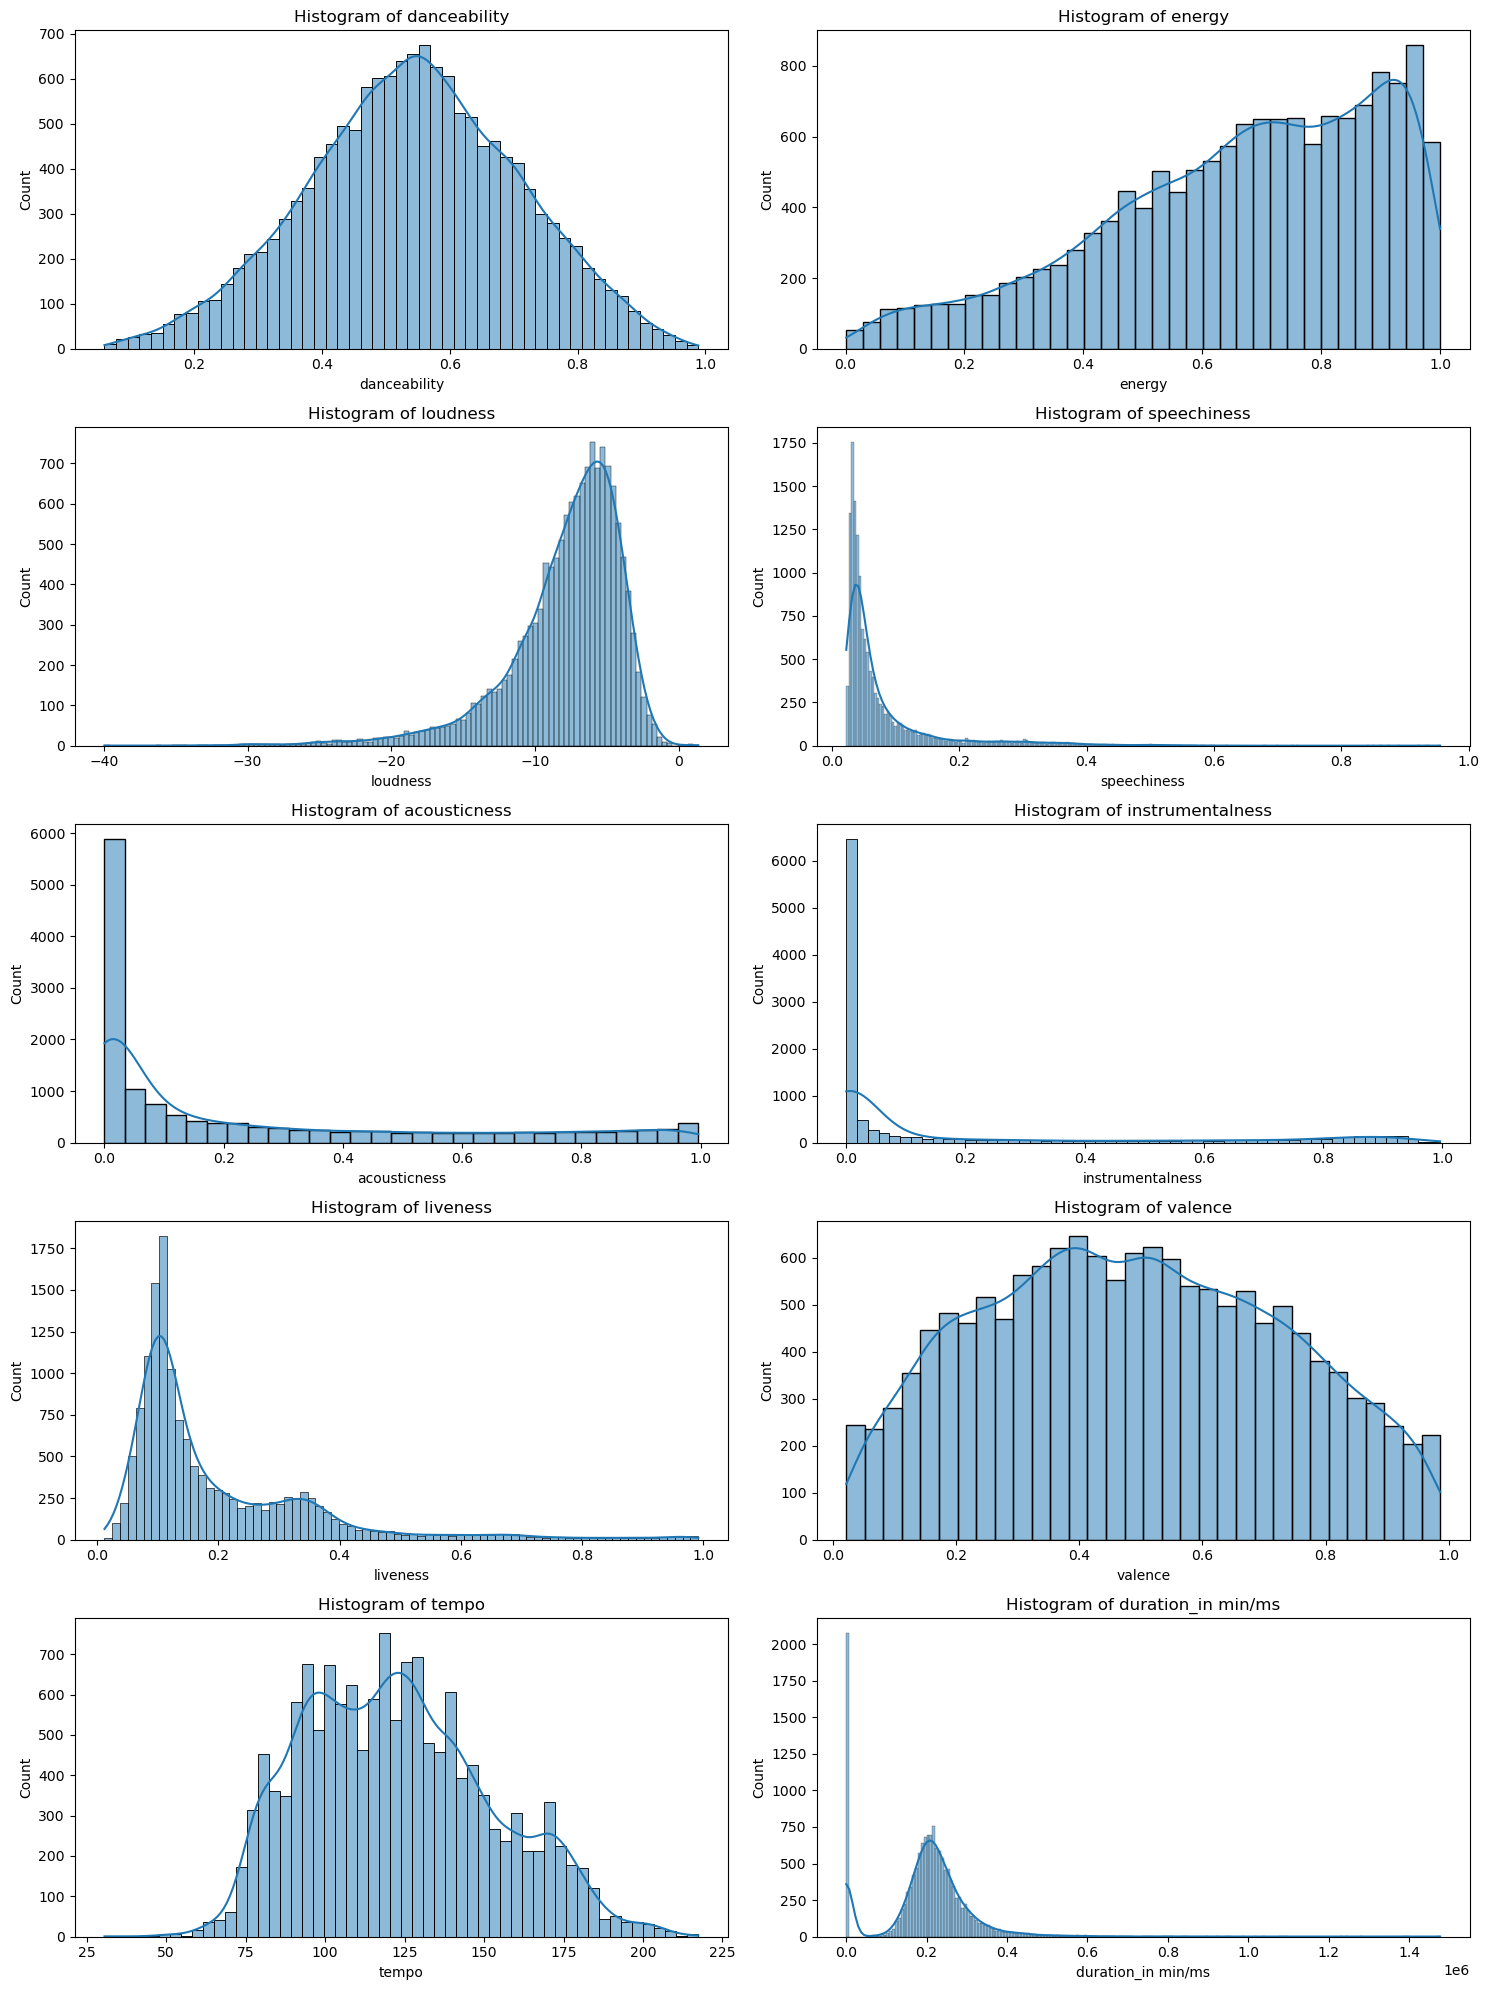

In [10]:
float_cols=['danceability', 'energy', 'loudness', 'speechiness', 'acousticness','instrumentalness', 'liveness',
            'valence', 'tempo','duration_in min/ms']

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))
axes = axes.flatten()
for i, col in enumerate(float_cols):
        sns.histplot(train_df[col], ax=axes[i], kde=True)
        axes[i].set_title(f'Histogram of {col}')

plt.tight_layout()
plt.show()

### 4.2 Correlation Heatmap 

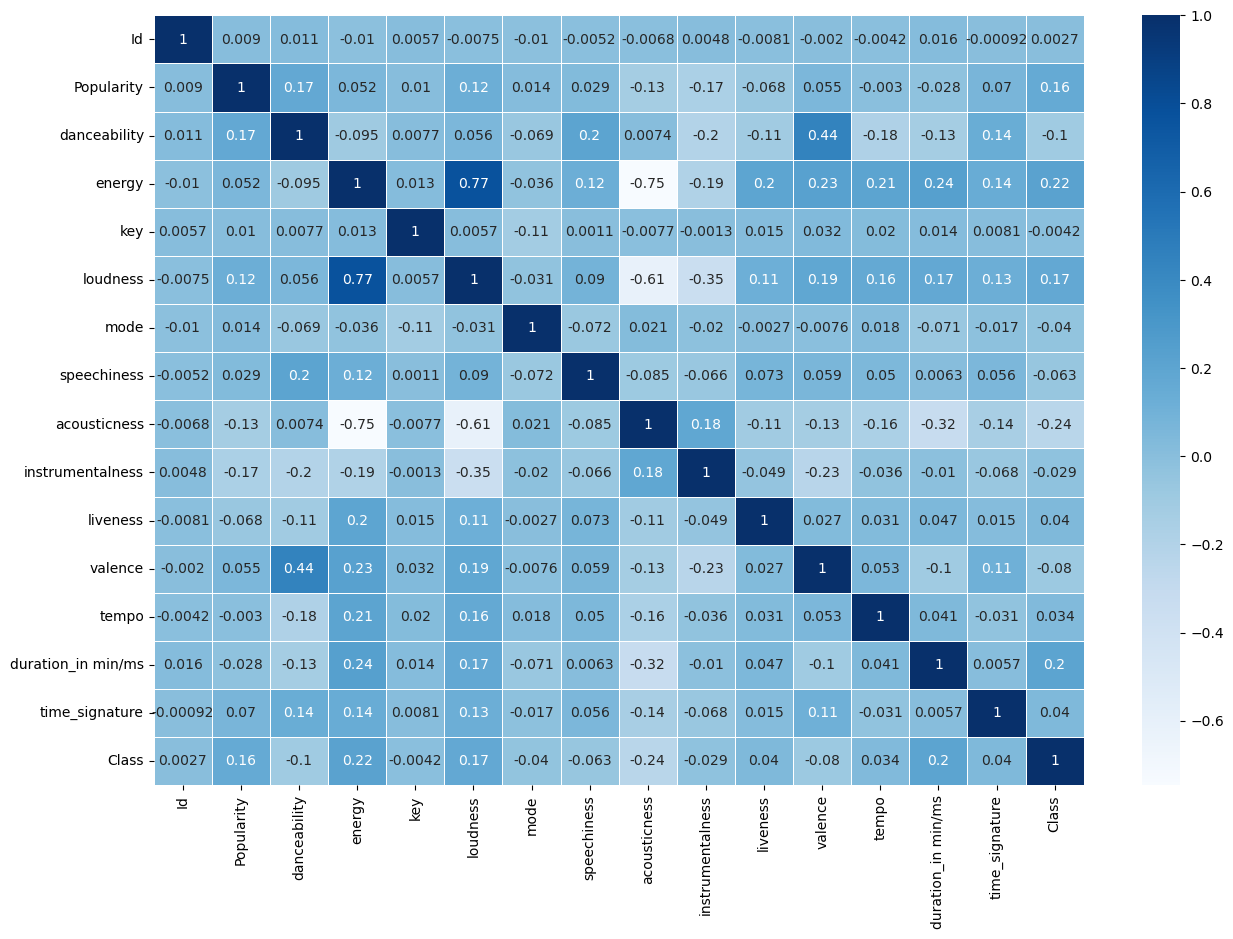

In [11]:
corr_matrix = train_df.select_dtypes(['int', 'float64']).corr()

plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, linewidths=0.5, cmap='Blues')
plt.show()

### 4.3 Displaying Nulls

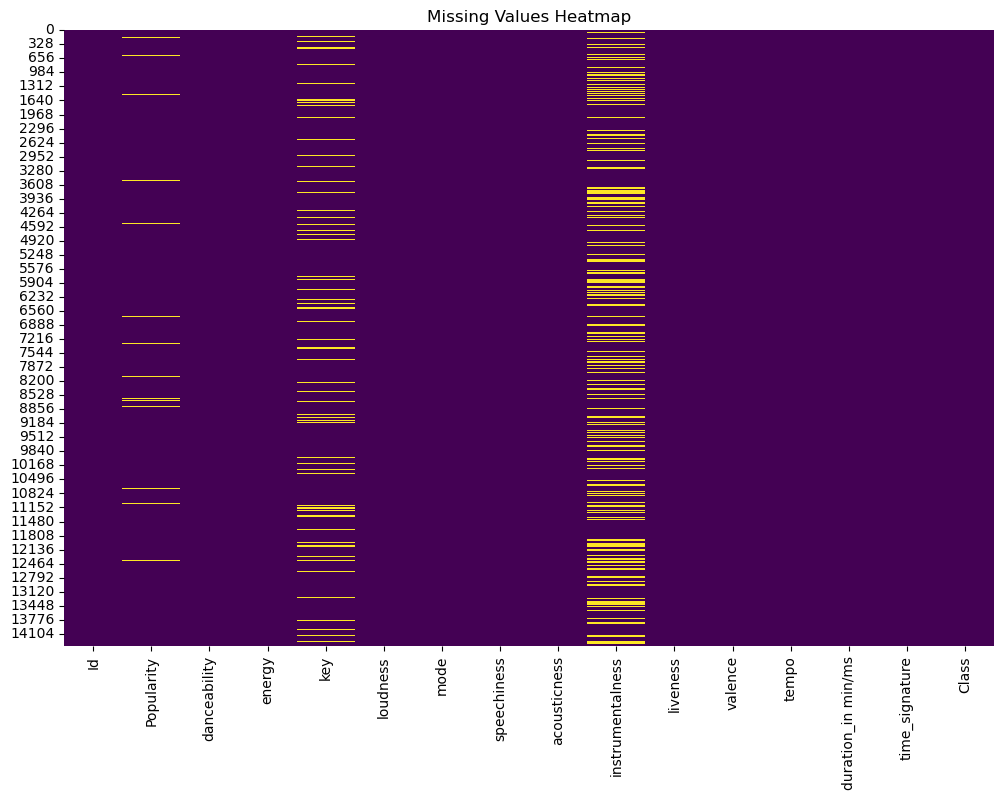

In [12]:
missing_values = train_df.isnull().sum()

plt.figure(figsize=(12, 8))
sns.heatmap(train_df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

### 4.3 Drop The Least Correlated Features 

In [13]:
train_df.drop(["instrumentalness", "key"], axis=1, inplace=True) # "key", "speechiness"
test_df.drop(["instrumentalness", "key"], axis=1, inplace=True)

In [14]:
print("Popularity mean (train_df) = ", train_df["Popularity"].mean())
print("Popularity mean (test_df)  = ", test_df["Popularity"].mean())

Popularity mean (train_df) =  44.525207992604706
Popularity mean (test_df)  =  44.45962910128388


In [15]:
# train_df["Popularity"].fillna(train_df["Popularity"].mean(), inplace=True)
# test_df["Popularity"].fillna(test_df["Popularity"].mean(), inplace=True)

imputer = KNNImputer(n_neighbors=3)
train_df = pd.DataFrame(imputer.fit_transform(train_df), columns=train_df.columns)
test_df = pd.DataFrame(imputer.fit_transform(test_df), columns=test_df.columns)

### 4.3 Check Outliers

#### 4.3.1 Using IQR

In [16]:
def get_outliers(col, multiplier=2.5, train_df = train_df): # 1.5
    Q1 = train_df[col].quantile(0.25)
    Q3 = train_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR
    iqr_outliers = train_df[(train_df[col] < lower_bound) | (train_df[col] > upper_bound)]
    
    return lower_bound, upper_bound, len(iqr_outliers)


for col in train_df.columns:
    lower_bound, upper_bound, outliers = get_outliers(col)
    print(f"Number of outliers detected based on IQR method ({str(col).center(20)}) : ", str(outliers).rjust(4), f"Lower = {str(round(lower_bound, 3)).rjust(10)}", f"Upper = {str(round(upper_bound, 2)).rjust(10)}")        

Number of outliers detected based on IQR method (         Id         ) :     0 Lower =   -14394.0 Upper =    28791.0
Number of outliers detected based on IQR method (     Popularity     ) :     0 Lower =      -24.5 Upper =      113.5
Number of outliers detected based on IQR method (    danceability    ) :     0 Lower =     -0.133 Upper =       1.22
Number of outliers detected based on IQR method (       energy       ) :     0 Lower =     -0.374 Upper =       1.74
Number of outliers detected based on IQR method (      loudness      ) :   238 Lower =    -20.478 Upper =       5.78
Number of outliers detected based on IQR method (        mode        ) :     0 Lower =       -2.5 Upper =        3.5
Number of outliers detected based on IQR method (    speechiness     ) :  1198 Lower =     -0.086 Upper =        0.2
Number of outliers detected based on IQR method (    acousticness    ) :     0 Lower =     -1.066 Upper =        1.5
Number of outliers detected based on IQR method (      liveness 

#### 4.3.2 Using Scatter Plot

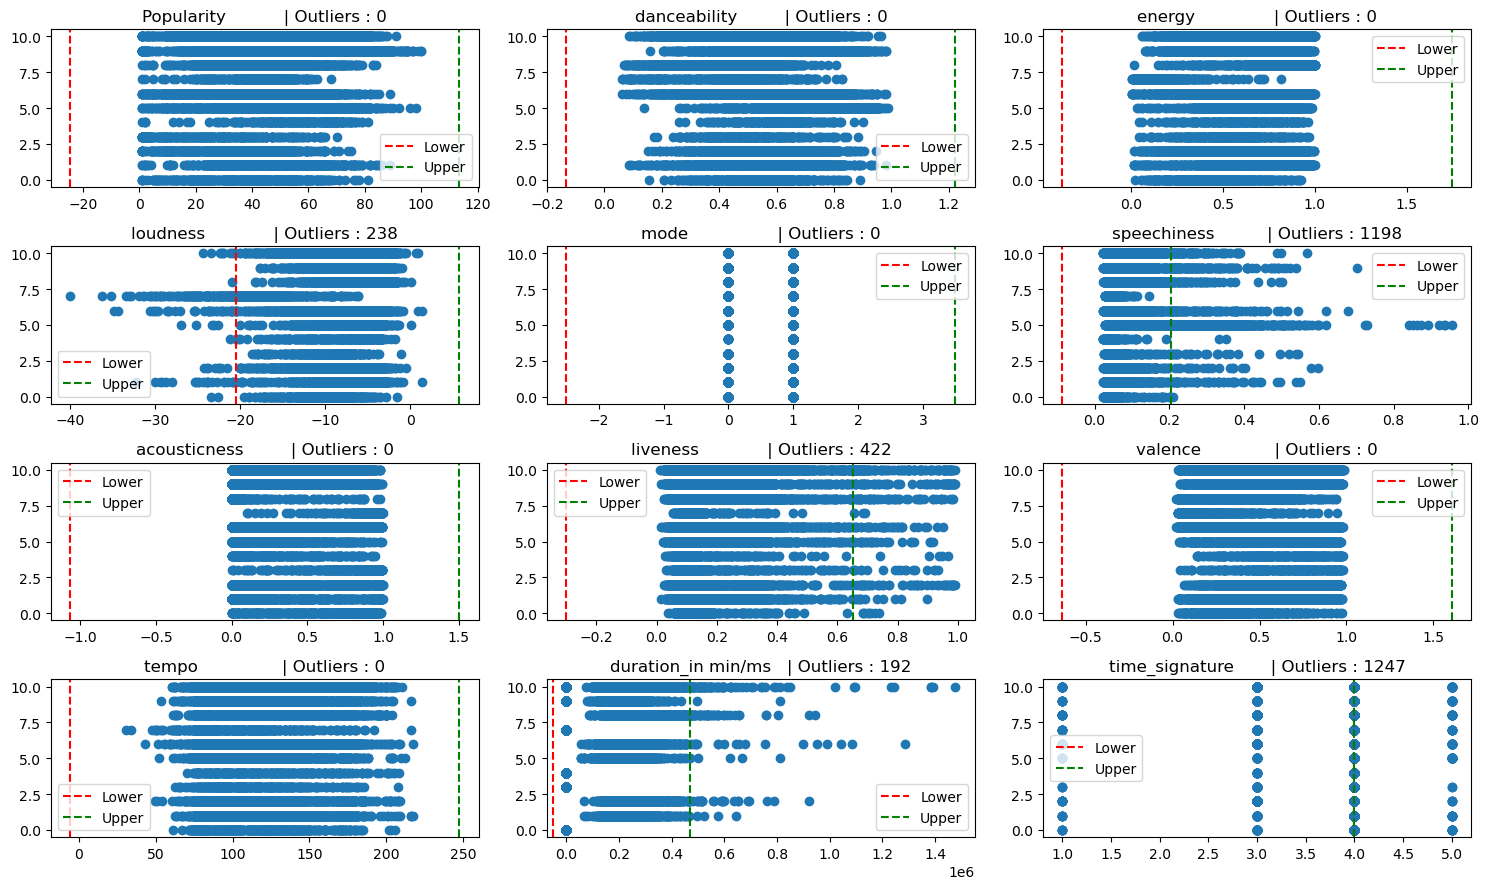

In [17]:
fig, axs = plt.subplots(4, 3, figsize=(15, 9))
axs = axs.flatten()

for i, col in enumerate(train_df.columns[1:-1]):
    axs[i].scatter(train_df[col], train_df["Class"])

    lower_bound, upper_bound, outliers = get_outliers(col)
    axs[i].axvline(x=lower_bound, color='r', linestyle='--', label='Lower')
    axs[i].axvline(x=upper_bound, color='g', linestyle='--', label='Upper')
    axs[i].legend()

    axs[i].set_title(f'{str(col).ljust(20)} | Outliers : {outliers}')
    
plt.tight_layout()
plt.show()

#### 4.3.3 Using Boxplot

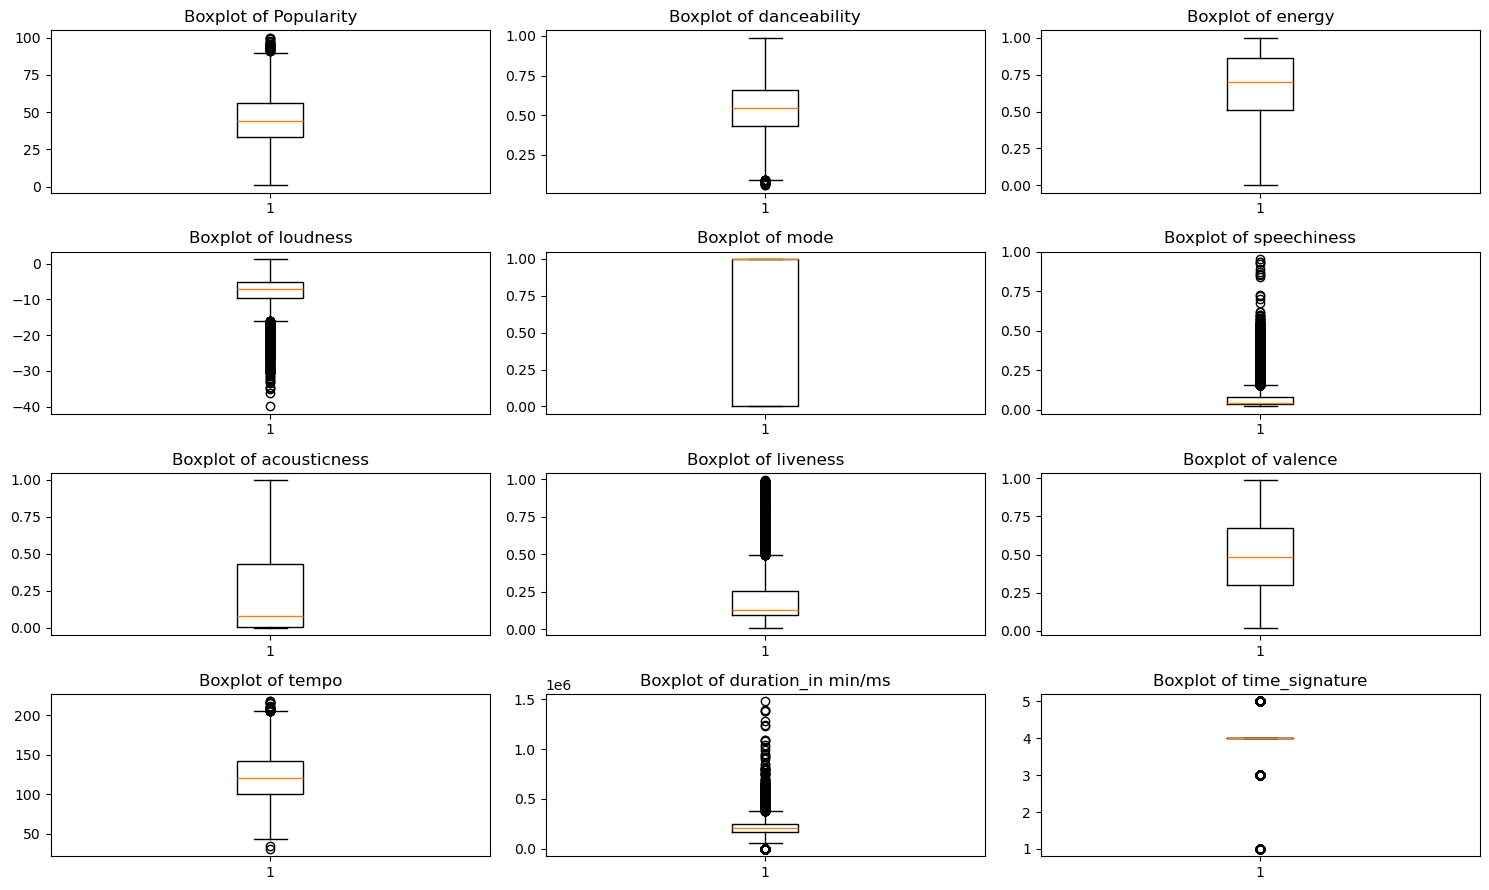

In [18]:
fig, axs = plt.subplots(4, 3, figsize=(15, 9))
axs = axs.flatten()

for i, col in enumerate(train_df.columns[1:-1]):
    axs[i].boxplot(train_df[col])
    axs[i].set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

### 

### 4.4 Plot Features

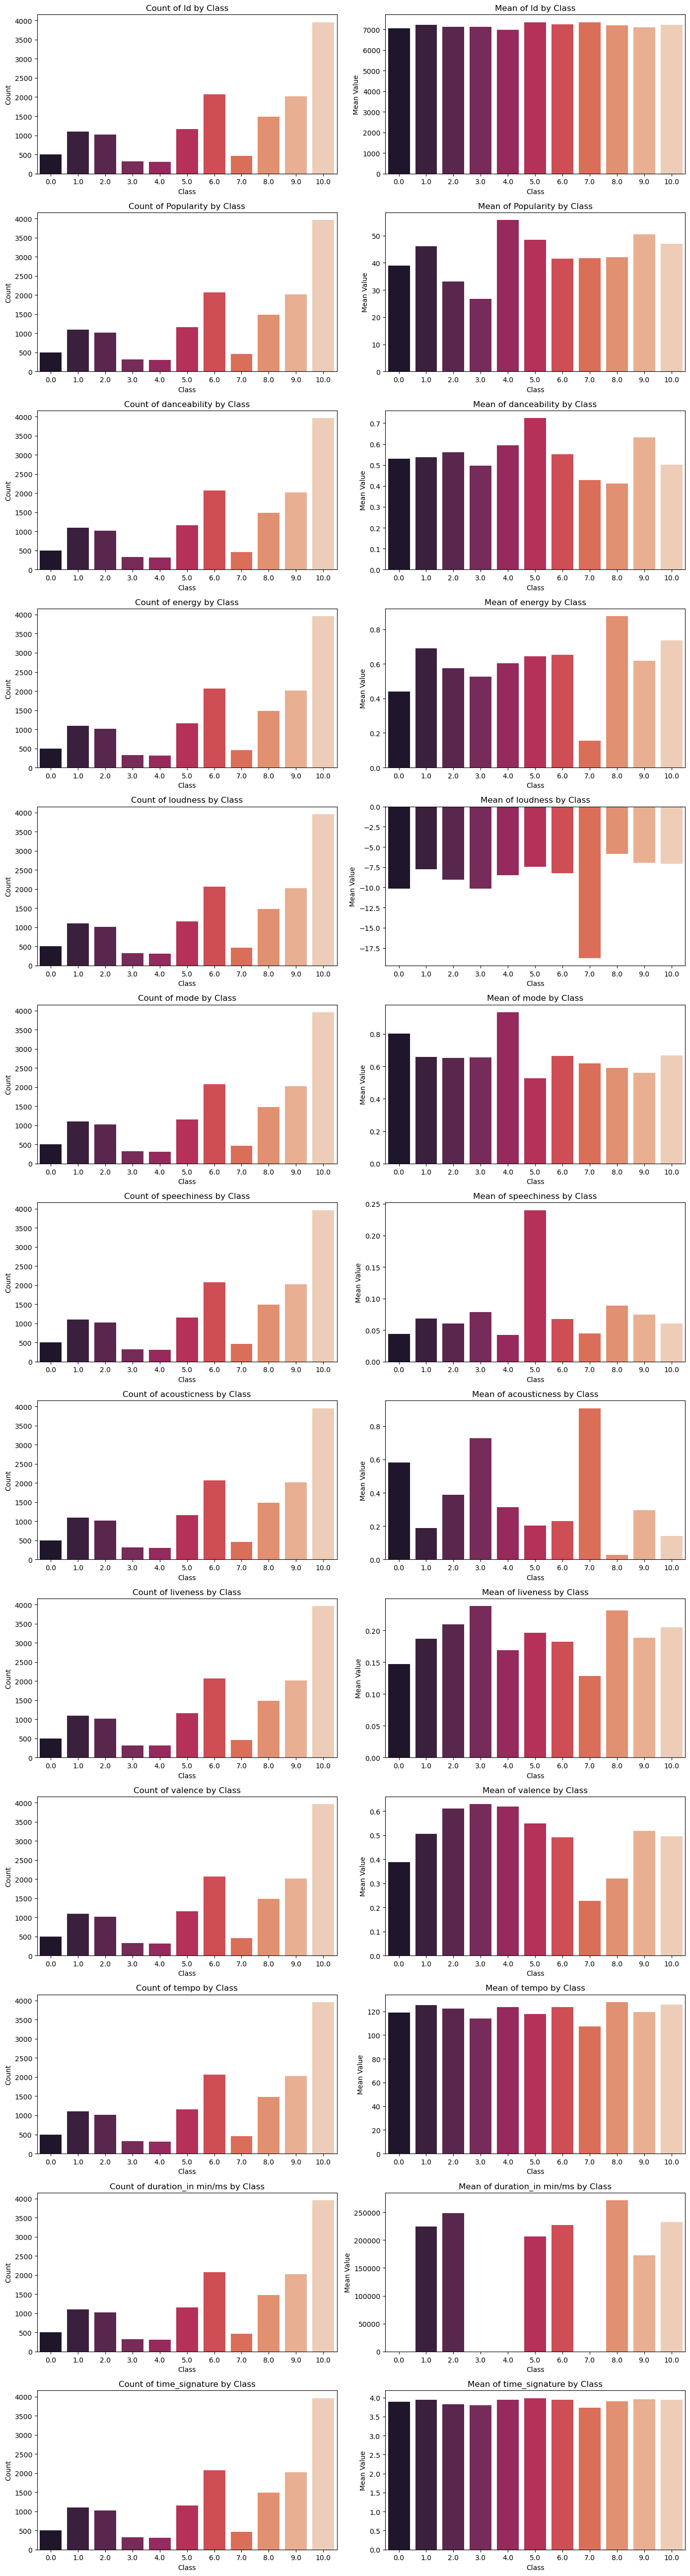

In [19]:
classes_unique_ordered = sorted(train_df["Class"].unique())

def plot_features(cols):
    # Create subplots
    fig, axes = plt.subplots(len(cols), 2, figsize=(14, 4 * len(cols)))
    
    for index, col in enumerate(cols):
        mean_feature_by_Class = train_df.groupby("Class")[col].mean().reindex(classes_unique_ordered)
        
        # Plot count plot
        sns.countplot(data=train_df, x="Class", order=classes_unique_ordered, ax=axes[index, 0], palette='rocket')
        axes[index, 0].set_title(f"Count of {col} by Class")
        axes[index, 0].set_xlabel("Class")
        axes[index, 0].set_ylabel("Count")
        
        # Plot bar plot
        sns.barplot(x=mean_feature_by_Class.index, y=mean_feature_by_Class.values, ax=axes[index, 1], palette='rocket')
        axes[index, 1].set_title(f"Mean of {col} by Class")
        axes[index, 1].set_xlabel("Class")
        axes[index, 1].set_ylabel("Mean Value")
    
    # Adjust layout
    plt.tight_layout()
    
    # Show plot
    plt.show()

plot_features(train_df.columns[:-1])

### 4.5 Plot Target

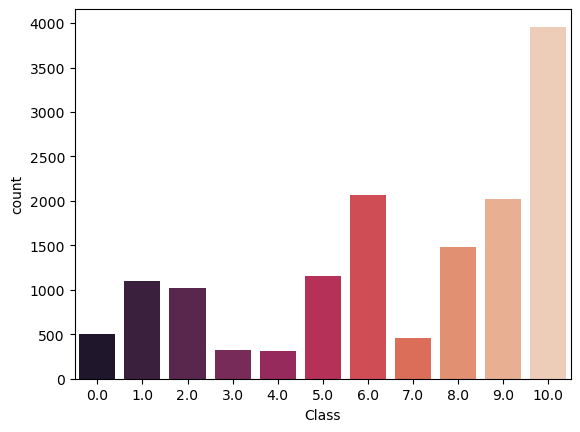

In [20]:
classes_unique_ordered = sorted(train_df["Class"].unique())

sns.countplot(data=train_df, x="Class", order=classes_unique_ordered, palette='rocket')
plt.show()

In [21]:
length = 600

for category in train_df["Class"].unique():
    category_length = len(train_df[train_df["Class"] == category])
    if  category_length > length:
        train_df = train_df[~train_df['Id'].isin((train_df[train_df["Class"] == category]).sample(category_length - length)['Id'])]
        print(f"Number of rows dropped from category {category} is {category_length - length}")

Number of rows dropped from category 9.0 is 1419
Number of rows dropped from category 6.0 is 1469
Number of rows dropped from category 10.0 is 3359
Number of rows dropped from category 2.0 is 418
Number of rows dropped from category 5.0 is 557
Number of rows dropped from category 8.0 is 883
Number of rows dropped from category 1.0 is 498


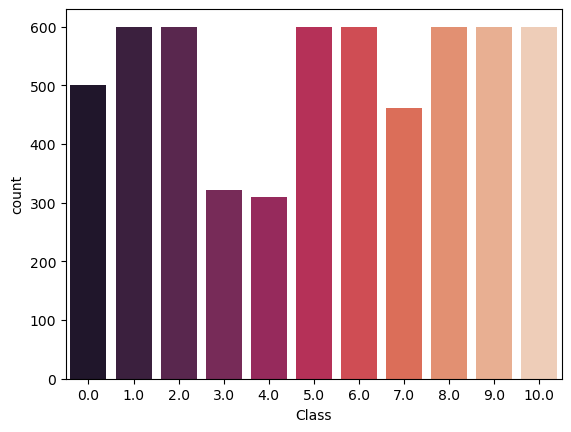

In [22]:
classes_unique_ordered = sorted(train_df["Class"].unique())

sns.countplot(data=train_df, x="Class", order=classes_unique_ordered, palette='rocket')
plt.show()

In [23]:
train_df_copy = train_df.copy()

In [24]:
train_df = train_df_copy.copy()

##### Drop Id

In [25]:
train_df.drop(["Id"], axis=1, inplace=True) 

test_IDs = test_df["Id"]
test_df.drop(["Id"], axis=1, inplace=True)

# train_df.drop(['key','mode','time_signature'], axis=1, inplace=True) 
# test_df.drop(['key','mode','time_signature'], axis=1, inplace=True)

In [26]:
X = train_df.drop(["Class"], axis=1)
y = train_df["Class"]

### 4.5 Features Selection

In [27]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=10)
X_new = selector.fit_transform(X, y)

mask = selector.get_support()
selected_columns = X.columns[mask]
X = X[selected_columns]

print("Selected Features : [", " | ".join(list(selected_columns)), "]")

Selected Features : [ Popularity | danceability | energy | loudness | mode | speechiness | acousticness | liveness | valence | duration_in min/ms ]


In [28]:
X.head()

,Popularity,danceability,energy,loudness,mode,speechiness,acousticness,liveness,valence,duration_in min/ms
0,37.0,0.334,0.536,-6.649,0.0,0.0381,0.378000,0.1060,0.2350,204947.000000
3,12.0,0.515,0.308,-14.711,1.0,0.0312,0.907000,0.3000,0.5010,298093.000000
5,38.0,0.657,0.813,-7.861,1.0,0.2160,0.008340,0.2080,0.5890,219587.000000
6,11.0,0.658,0.431,-12.718,0.0,0.0300,0.615000,0.0902,0.5280,3.893933
7,45.0,0.441,0.994,-2.934,1.0,0.2390,0.000073,0.3820,0.0478,213125.000000


### 4.6 Splitting

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### 4.7 Handle Imbalanced Data

In [30]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

# undersampler = RandomUnderSampler()
# X, y = undersampler.fit_resample(X, y)

smote = SMOTE(sampling_strategy={i:8000 for i in range(len(y.unique()))}, random_state=None) # {i:100000 for i in range(11)}
X, y = smote.fit_resample(X, y)

### 4.8 Scaling

In [31]:
 scaler = StandardScaler()
X_train  = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test   = pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns)

submission_data = pd.DataFrame(scaler.fit_transform(test_df), columns=test_df.columns)

In [32]:
X_train

,Popularity,danceability,energy,loudness,mode,speechiness,acousticness,liveness,valence,duration_in min/ms
0,0.982724,1.590444,-0.392538,-0.150545,-1.693928,2.103910,-0.747949,0.033433,1.043371,0.900950
1,-0.541896,-1.398390,-2.141206,-3.486854,0.821383,-0.388909,1.869315,-0.610183,-2.036852,-1.118773
2,-0.595926,-1.189294,1.347220,1.000421,-0.127211,-0.175305,-1.088616,1.268862,0.735603,-0.054312
3,0.318545,2.317387,0.180668,-0.346918,0.821383,2.831024,-1.066365,-0.610543,0.322255,0.775109
4,-0.230884,0.265285,0.001330,-0.286172,0.332616,-0.171277,0.703565,-0.533636,0.280157,-1.118750
...,...,...,...,...,...,...,...,...,...,...
70395,0.080128,0.096127,-1.512918,0.086347,0.821383,-0.536680,1.492796,-0.524105,-1.053655,-1.118769
70396,-0.838938,0.743415,-1.863469,-1.456562,0.821383,0.151790,1.723297,-0.597936,-0.743494,0.201723
70397,-0.259099,-0.337162,0.918631,0.716380,-1.693928,-0.226730,-0.944749,-0.260352,-0.231537,0.689493
70398,1.044294,1.571332,-0.461143,0.169070,-1.693928,0.709539,0.039518,-0.371516,0.919410,0.806380


## 5. Modeling

### 5.1 Random Forest

In [33]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier

randomForest_model = RandomForestClassifier(class_weight='balanced', random_state=42)
randomForest_model.fit(X_train, y_train)

randomForest_y_pred = randomForest_model.predict(X_test)

rf_accuracy = accuracy_score(y_test, randomForest_y_pred)
rf_f1 = f1_score(y_test, randomForest_y_pred, average='weighted')  # Compute F1 score
rf_report = classification_report(y_test, randomForest_y_pred)
rf_conf_matrix = confusion_matrix(y_test, randomForest_y_pred)

print("Accuracy: ", rf_accuracy)
print("F1 Score: ", rf_f1)
print("\nClassification Report:\n", rf_report)

Accuracy:  0.9090909090909091
F1 Score:  0.9087505405595468

Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      0.96      0.92      1600
         1.0       0.85      0.84      0.85      1600
         2.0       0.91      0.95      0.93      1600
         3.0       0.99      0.85      0.91      1600
         4.0       0.88      0.97      0.93      1600
         5.0       0.92      0.97      0.95      1600
         6.0       0.90      0.82      0.86      1600
         7.0       0.99      0.95      0.97      1600
         8.0       0.94      0.92      0.93      1600
         9.0       0.90      0.89      0.90      1600
        10.0       0.86      0.86      0.86      1600

    accuracy                           0.91     17600
   macro avg       0.91      0.91      0.91     17600
weighted avg       0.91      0.91      0.91     17600



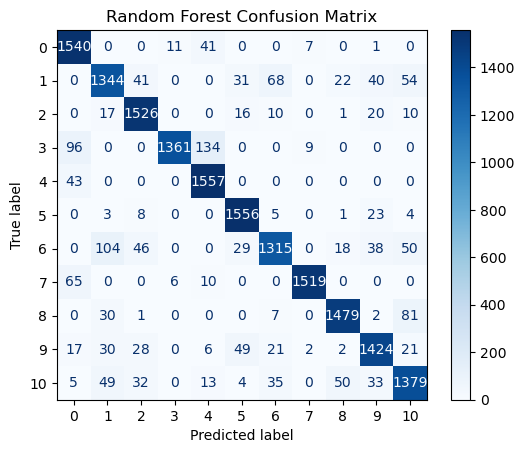

In [34]:
disp = ConfusionMatrixDisplay(confusion_matrix=rf_conf_matrix)
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Random Forest Confusion Matrix')
plt.show()

In [35]:
for index, (real_value, predicted_value) in zip(range(1, 20), zip(y_test, randomForest_y_pred)):        
    print(f"Real value is {str(round(real_value)).rjust(5)} | The predicted value is {str(round(predicted_value)).rjust(5)}")

Real value is     0 | The predicted value is     0
Real value is     9 | The predicted value is     9
Real value is     4 | The predicted value is     4
Real value is     5 | The predicted value is     5
Real value is     8 | The predicted value is     8
Real value is     0 | The predicted value is     0
Real value is     3 | The predicted value is     3
Real value is     9 | The predicted value is     9
Real value is     3 | The predicted value is     3
Real value is     2 | The predicted value is     2
Real value is    10 | The predicted value is    10
Real value is     4 | The predicted value is     4
Real value is     7 | The predicted value is     7
Real value is     3 | The predicted value is     3
Real value is     7 | The predicted value is     7
Real value is     3 | The predicted value is     3
Real value is    10 | The predicted value is    10
Real value is     4 | The predicted value is     4
Real value is     2 | The predicted value is     2


### 

### 5.2 XGBoost

In [36]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

params = {
    'objective': 'multi:softmax',
    'num_class': 11,
    'learning_rate': 0.1,
    'max_depth': 6,
    'eval_metric': 'mlogloss',
    'seed': 42
}

# Train the model
num_rounds = 100
model = xgb.train(params, dtrain, num_rounds)

# Make predictions
xgb_y_pred = model.predict(dtest)

rf_accuracy = accuracy_score(y_test, xgb_y_pred)
rf_f1 = f1_score(y_test, xgb_y_pred, average='weighted')
rf_report = classification_report(y_test, xgb_y_pred)
rf_conf_matrix = confusion_matrix(y_test, xgb_y_pred)

print("Accuracy: ", rf_accuracy)
print("F1 Score: ", rf_f1)
print("\nClassification Report:\n", rf_report)

Accuracy:  0.7521590909090909
F1 Score:  0.7476635277011964

Classification Report:
               precision    recall  f1-score   support

         0.0       0.76      0.90      0.83      1600
         1.0       0.51      0.47      0.49      1600
         2.0       0.68      0.82      0.74      1600
         3.0       0.96      0.76      0.85      1600
         4.0       0.84      0.91      0.87      1600
         5.0       0.81      0.90      0.86      1600
         6.0       0.62      0.44      0.51      1600
         7.0       0.95      0.92      0.94      1600
         8.0       0.84      0.84      0.84      1600
         9.0       0.68      0.69      0.68      1600
        10.0       0.61      0.62      0.61      1600

    accuracy                           0.75     17600
   macro avg       0.75      0.75      0.75     17600
weighted avg       0.75      0.75      0.75     17600



### 

### 5.3 Gradient Boosting

In [37]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

gb_y_pred = gb_model.predict(X_test)

gb_accuracy = accuracy_score(y_test, gb_y_pred)
gb_f1 = f1_score(y_test, gb_y_pred, average='weighted')  # Compute F1 score
gb_report = classification_report(y_test, gb_y_pred)
gb_conf_matrix = confusion_matrix(y_test, gb_y_pred)

print("Accuracy: ", gb_accuracy)
print("F1 Score: ", gb_f1)
print("\nClassification Report:\n", gb_report)

Accuracy:  0.6749431818181818
F1 Score:  0.6703068414638412

Classification Report:
               precision    recall  f1-score   support

         0.0       0.67      0.84      0.75      1600
         1.0       0.41      0.39      0.40      1600
         2.0       0.62      0.73      0.67      1600
         3.0       0.82      0.89      0.85      1600
         4.0       0.93      0.69      0.79      1600
         5.0       0.79      0.84      0.82      1600
         6.0       0.47      0.31      0.37      1600
         7.0       0.92      0.92      0.92      1600
         8.0       0.81      0.79      0.80      1600
         9.0       0.53      0.56      0.54      1600
        10.0       0.46      0.47      0.46      1600

    accuracy                           0.67     17600
   macro avg       0.67      0.67      0.67     17600
weighted avg       0.67      0.67      0.67     17600



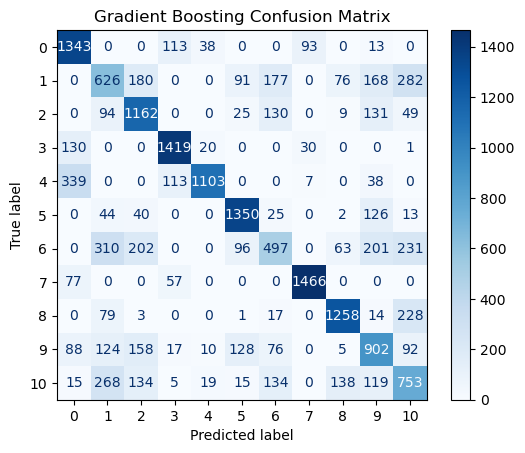

In [38]:
disp = ConfusionMatrixDisplay(confusion_matrix=gb_conf_matrix)
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Gradient Boosting Confusion Matrix')
plt.show()

In [39]:
for index, (real_value, predicted_value) in zip(range(1, 20), zip(y_test, gb_y_pred)):        
    print(f"Real value is {str(round(real_value)).rjust(5)} | The predicted value is {str(round(predicted_value)).rjust(5)}")

Real value is     0 | The predicted value is     0
Real value is     9 | The predicted value is     2
Real value is     4 | The predicted value is     3
Real value is     5 | The predicted value is     5
Real value is     8 | The predicted value is     8
Real value is     0 | The predicted value is     0
Real value is     3 | The predicted value is     3
Real value is     9 | The predicted value is     1
Real value is     3 | The predicted value is     3
Real value is     2 | The predicted value is     2
Real value is    10 | The predicted value is     9
Real value is     4 | The predicted value is     4
Real value is     7 | The predicted value is     7
Real value is     3 | The predicted value is     3
Real value is     7 | The predicted value is     7
Real value is     3 | The predicted value is     3
Real value is    10 | The predicted value is    10
Real value is     4 | The predicted value is     4
Real value is     2 | The predicted value is     2


### 

### 5.4 KNN

In [40]:
from sklearn.neighbors import KNeighborsClassifier

k = 5
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X_train, y_train)
kNN_y_pred = knn_model.predict(X_test)


knn_accuracy = accuracy_score(y_test, kNN_y_pred)
knn_f1 = f1_score(y_test, kNN_y_pred, average='weighted')  # Compute F1 score
knn_report = classification_report(y_test, kNN_y_pred)
knn_conf_matrix = confusion_matrix(y_test, kNN_y_pred)

print("Accuracy: ", knn_accuracy)
print("F1 Score: ", knn_f1)
print("\nClassification Report:\n", knn_report)

Accuracy:  0.893125
F1 Score:  0.8928567825616655

Classification Report:
               precision    recall  f1-score   support

         0.0       0.97      0.95      0.96      1600
         1.0       0.73      0.80      0.76      1600
         2.0       0.87      0.90      0.88      1600
         3.0       0.97      0.98      0.98      1600
         4.0       0.96      0.99      0.98      1600
         5.0       0.94      0.94      0.94      1600
         6.0       0.81      0.76      0.78      1600
         7.0       0.98      0.98      0.98      1600
         8.0       0.90      0.92      0.91      1600
         9.0       0.86      0.84      0.85      1600
        10.0       0.84      0.76      0.80      1600

    accuracy                           0.89     17600
   macro avg       0.89      0.89      0.89     17600
weighted avg       0.89      0.89      0.89     17600



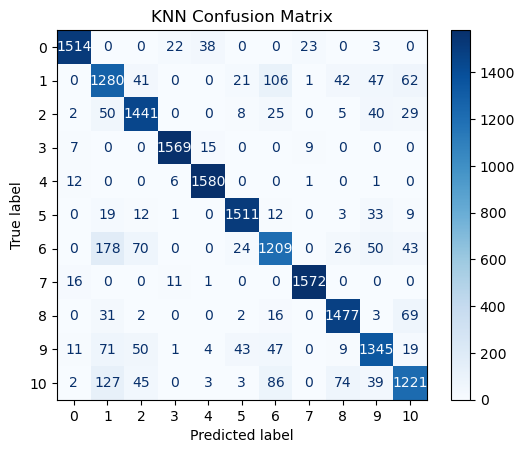

In [41]:
disp = ConfusionMatrixDisplay(confusion_matrix=knn_conf_matrix)
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('KNN Confusion Matrix')
plt.show()

In [42]:
for index, (real_value, predicted_value) in zip(range(1, 20), zip(y_test, kNN_y_pred)):        
    print(f"Real Class : {str(round(real_value)).rjust(5)} | Predicted Class : {str(round(predicted_value)).rjust(5)}")

Real Class :     0 | Predicted Class :     0
Real Class :     9 | Predicted Class :     9
Real Class :     4 | Predicted Class :     4
Real Class :     5 | Predicted Class :     5
Real Class :     8 | Predicted Class :     8
Real Class :     0 | Predicted Class :     0
Real Class :     3 | Predicted Class :     3
Real Class :     9 | Predicted Class :     9
Real Class :     3 | Predicted Class :     3
Real Class :     2 | Predicted Class :     2
Real Class :    10 | Predicted Class :    10
Real Class :     4 | Predicted Class :     4
Real Class :     7 | Predicted Class :     7
Real Class :     3 | Predicted Class :     3
Real Class :     7 | Predicted Class :     7
Real Class :     3 | Predicted Class :     3
Real Class :    10 | Predicted Class :    10
Real Class :     4 | Predicted Class :     4
Real Class :     2 | Predicted Class :     2


### 5.5 Cat

In [43]:
catBoost_model = CatBoostClassifier(
    iterations=1500,          
    learning_rate=0.1,        
    depth=6,                  
    loss_function='MultiClass', 
    eval_metric='Accuracy',   
    random_seed=42,
    verbose=200               
)

catBoost_model.fit(X_train, y_train)
catBoost_pred = catBoost_model.predict(X_test)
catBoost_pred

catBoost_accuracy = accuracy_score(y_test, catBoost_pred)
catBoost_f1 = f1_score(y_test, catBoost_pred, average='weighted')  # Compute F1 score
catBoost_report = classification_report(y_test, catBoost_pred)
catBoost_conf_matrix = confusion_matrix(y_test, catBoost_pred)

print("Accuracy: ", catBoost_accuracy)
print("F1 Score: ", catBoost_f1)
print("\nClassification Report:\n", catBoost_report)

0:	learn: 0.4969886	total: 123ms	remaining: 3m 4s
200:	learn: 0.7546875	total: 13.5s	remaining: 1m 27s
400:	learn: 0.8325426	total: 26.8s	remaining: 1m 13s
600:	learn: 0.8820028	total: 40.1s	remaining: 1m
800:	learn: 0.9150284	total: 53.6s	remaining: 46.7s
1000:	learn: 0.9368466	total: 1m 6s	remaining: 33.3s
1200:	learn: 0.9512074	total: 1m 20s	remaining: 19.9s
1400:	learn: 0.9626278	total: 1m 36s	remaining: 6.82s
1499:	learn: 0.9669176	total: 1m 44s	remaining: 0us
Accuracy:  0.8751704545454545
F1 Score:  0.8745969141326856

Classification Report:
               precision    recall  f1-score   support

         0.0       0.84      0.91      0.87      1600
         1.0       0.80      0.77      0.78      1600
         2.0       0.88      0.92      0.90      1600
         3.0       0.95      0.80      0.87      1600
         4.0       0.85      0.97      0.90      1600
         5.0       0.92      0.97      0.94      1600
         6.0       0.82      0.77      0.79      1600
         7.0

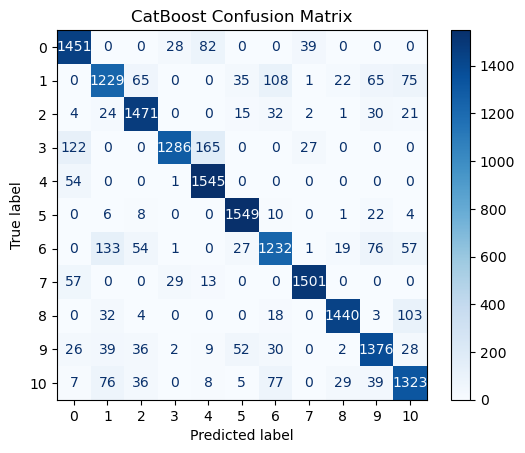

In [44]:
disp = ConfusionMatrixDisplay(confusion_matrix=catBoost_conf_matrix)
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('CatBoost Confusion Matrix')
plt.show()

### LGBM

In [45]:
lgbm_model = LGBMClassifier()
lgbm_model.fit(X_train, y_train)
lgbm_y_pred = lgbm_model.predict(X_test)

# lgbm_model.score(X_test, y_test)

lgbm_accuracy = accuracy_score(y_test, lgbm_y_pred)
lgbm_f1 = f1_score(y_test, lgbm_y_pred, average='weighted')  # Compute F1 score
lgbm_report = classification_report(y_test, lgbm_y_pred)
lgbm_conf_matrix = confusion_matrix(y_test, lgbm_y_pred)

print("Accuracy: ", lgbm_accuracy)
print("F1 Score: ", lgbm_f1)
print("\nClassification Report:\n", lgbm_report)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003354 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 70400, number of used features: 10
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
Accuracy:  0.8152840909090909
F1 Scor

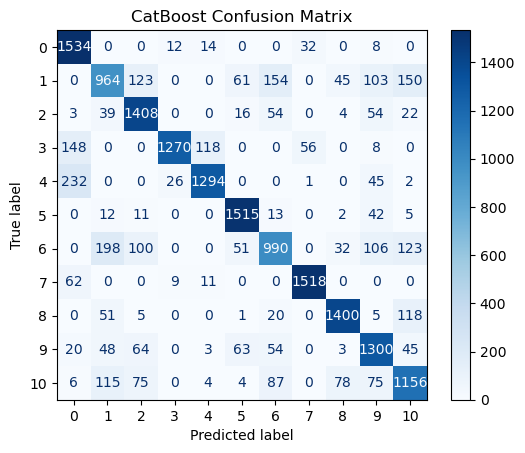

In [46]:
disp = ConfusionMatrixDisplay(confusion_matrix=lgbm_conf_matrix)
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('CatBoost Confusion Matrix')
plt.show()

### Deep learning 

In [47]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import class_weight

# class_weights = class_weight.compute_class_weight('balanced', np.unique(y_resampled), y_resampled)
# class_weights_dict = dict(enumerate(class_weights))

# Step 2: Build the Model
def create_model(input_shape, num_classes):
    model = models.Sequential()
    
    # Add layers
    model.add(layers.Dense(128, input_shape=(input_shape,), activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.5))
    
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.5))
    
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.5))
    
    model.add(layers.Dense(num_classes, activation='softmax'))  # Output layer
    
    return model

input_shape = X_train.shape[1]
num_classes = len(np.unique(y_train))

model = create_model(input_shape, num_classes)
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    epochs=100, 
                    batch_size=32,
                    validation_data=(X_test, y_test),
                    # class_weight=class_weights_dict,  # Apply class weights
                    verbose=1)

# Step 5: Evaluate the Model
y_pred = np.argmax(model.predict(X_test), axis=1)

# Calculate accuracy and F1-score
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"F1-Score: {f1:.4f}")

Epoch 1/100
2200/2200 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.3655 - loss: 1.9164 - val_accuracy: 0.5972 - val_loss: 1.0687
Epoch 2/100
2200/2200 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5372 - loss: 1.2749 - val_accuracy: 0.6101 - val_loss: 1.0264
Epoch 3/100
2200/2200 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5546 - loss: 1.2300 - val_accuracy: 0.6202 - val_loss: 1.0029
Epoch 4/100
2200/2200 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5678 - loss: 1.1943 - val_accuracy: 0.6212 - val_loss: 0.9814
Epoch 5/100
2200/2200 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5715 - loss: 1.1805 - val_accuracy: 0.6256 - val_loss: 0.9734
Epoch 6/100
2200/2200 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5723 - loss: 1.1656 - val_accuracy: 0.6257 - val_loss: 0.9676
Epoch 7/100
2200/2200 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5796 - loss: 1.1564 - val_accuracy: 0.6350 - val_loss: 0.9533
Epoch 8/100
2200/2200 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5822 - loss: 1

## 6. Evaluation

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer, f1_score

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scorer = make_scorer(f1_score, average='weighted')
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=cv, scoring=scorer)

print(f"Cross-Validation F1-Score for each fold: {cv_scores}")
print(f"Mean F1-Score: {cv_scores.mean():.4f}")
print(f"Standard Deviation of F1-Score: {cv_scores.std():.4f}")

Cross-Validation F1-Score for each fold: [0.92616836 0.92278328 0.92073802 0.92299705 0.92165876]
Mean F1-Score: 0.9229
Standard Deviation of F1-Score: 0.0018


## 7. Fine Tuning

In [49]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

param_grid = {
    'n_estimators': [100, 200],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [10, 20],  
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True]  
}


rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, 
                           scoring=make_scorer(f1_score, average='weighted'))

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score  = grid_search.best_score_

print(f"Best parameters: {best_params}")
print(f"Best cross-validation F1 score: {best_score}\n")

best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best parameters: {'bootstrap': True, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best cross-validation F1 score: 0.9139075826680582



RandomForestClassifier(max_depth=20, n_estimators=200, random_state=42)

In [50]:
print(f"Test F1 score: {f1_score(y_test, best_model.predict(X_test), average='weighted')}\n\n")

Test F1 score: 0.8965770944544956




## 8. Prediction & Submission

In [51]:
best_predictions = best_model.predict(submission_data[selected_columns])

for index, pred in zip(range(1, 20), best_predictions):
    print(f"{str(index).rjust(2)} - ", str(round(pred, 1)).rjust(7))

 1 -      9.0
 2 -      2.0
 3 -      9.0
 4 -      6.0
 5 -      5.0
 6 -      1.0
 7 -      1.0
 8 -      9.0
 9 -      5.0
10 -      2.0
11 -      8.0
12 -      2.0
13 -      5.0
14 -      6.0
15 -     10.0
16 -      4.0
17 -      5.0
18 -      2.0
19 -     10.0


In [52]:
test_df

,Popularity,danceability,energy,loudness,mode,speechiness,acousticness,liveness,valence,tempo,duration_in min/ms,time_signature
0,55.0,0.691,0.670,-7.093,0.0,0.0941,0.075700,0.1970,0.635,89.965,200000.0,4.0
1,14.0,0.461,0.777,-7.469,1.0,0.0306,0.388000,0.2910,0.525,163.043,283909.0,4.0
2,80.0,0.656,0.291,-10.572,1.0,0.0293,0.872000,0.1140,0.298,103.971,232533.0,4.0
3,52.0,0.480,0.826,-4.602,1.0,0.0397,0.000797,0.1250,0.687,96.000,222053.0,4.0
4,23.0,0.734,0.729,-6.381,0.0,0.2830,0.147000,0.0672,0.805,76.030,118439.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3595,55.0,0.271,0.866,-4.072,0.0,0.0578,0.048900,0.1160,0.127,175.665,267987.0,4.0
3596,38.0,0.598,0.690,-4.758,0.0,0.3030,0.363000,0.0519,0.653,187.934,198300.0,4.0
3597,18.0,0.783,0.820,-6.102,1.0,0.0489,0.000540,0.0628,0.235,129.015,339213.0,4.0
3598,38.0,0.443,0.401,-13.997,1.0,0.0426,0.263000,0.1680,0.751,168.209,182587.0,3.0


In [53]:
# Dataset contains 2 columns | 1st one is the ID, 2nd one is the prediction

data_for_sub = pd.DataFrame({"Id":test_IDs, "Class":best_predictions})
data_for_sub.to_csv("Submission RF.csv", index=False)